In [145]:
import numpy as np
from keras import datasets, layers,utils,Sequential
import cv2 as cv
from keras.src.layers import Dense
import matplotlib.pyplot as plt
from PIL import Image

In [146]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = datasets.mnist.load_data()

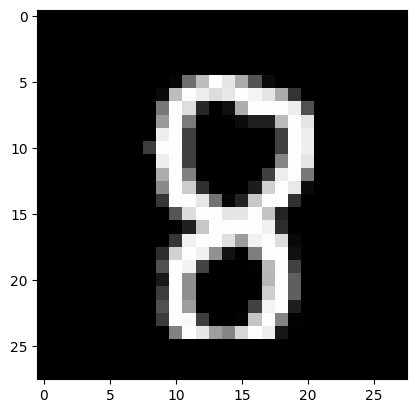

In [147]:
plt.imshow(Image.fromarray(x_train_org[188]).convert('RGBA'))
plt.show()

In [148]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [149]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

In [150]:
print(y_train_org[188])

8


In [151]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [152]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [153]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [154]:
print(model.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [155]:
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1, validation_split=0.2)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8602 - loss: 0.4729 - val_accuracy: 0.9643 - val_loss: 0.1202
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9732 - loss: 0.0907 - val_accuracy: 0.9707 - val_loss: 0.0937
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9773 - val_loss: 0.0767
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9769 - val_loss: 0.0866
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9748 - val_loss: 0.0919
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9772 - val_loss: 0.0835
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9964 - loss: 0.0130 - val_accuracy: 0.9732 - val_loss: 0.1033
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accu

In [159]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 98.02%


In [160]:
model.save("mnist_dense.h5")